# Career Prediction Model using Deep Learning 
##### Artificial Neural Networks are employed
* This model uses an annonymized dataset for training the ANN with 20000 entries and 38 features
* 14 Numeric an remaining Non-Numeric Features
* This Model Suggests the Job Role Category and the Roles 
* The features contain Academic Data, Personal Intrest Data, Knowledge Data, Communication Skill Data, Teamwork Data, Problem Solving Data, Self Management Data

## Importing Libraries

In [83]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from scipy import sparse
from imblearn.over_sampling import RandomOverSampler
from mpl_toolkits.mplot3d import Axes3D


## Importing Dataset and Analyzing the data

In [50]:
data = pd.read_csv("dataset/educational.csv")
data.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [51]:
data.columns


Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Rea

In [52]:
data.shape


(20000, 39)

In [53]:
data.iloc[:,:9]


,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills
0,69,63,78,87,94,94,87,84,61
1,78,62,73,60,71,70,73,84,91
2,71,86,91,87,61,81,72,72,94
3,76,87,60,84,89,73,62,88,69
4,92,62,90,67,71,89,73,71,73
...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69
19996,80,69,83,87,82,66,66,92,67
19997,83,70,80,87,64,85,69,94,88
19998,68,87,91,88,66,74,61,87,61


In [54]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [55]:
data.describe()


,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800
std,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000


In [56]:
for i in range(0,data.shape[1]):
    print("------------------------------------------")
    print("Unique values for " + data.columns[i])
    print("Number of Unique Values: ",len(np.unique(data.iloc[:,i])))
    print("------------------------------------------")
    print(data.iloc[:,i].unique())


------------------------------------------
Unique values for Acedamic percentage in Operating Systems
Number of Unique Values:  35
------------------------------------------
[69 78 71 76 92 88 93 84 73 62 63 68 90 94 60 82 67 65 74 75 83 89 80 70
 66 85 61 81 79 86 64 91 72 77 87]
------------------------------------------
Unique values for percentage in Algorithms
Number of Unique Values:  35
------------------------------------------
[63 62 86 87 77 72 66 76 80 64 93 83 71 92 91 73 61 89 67 74 82 60 68 88
 70 85 81 78 84 69 94 75 65 79 90]
------------------------------------------
Unique values for Percentage in Programming Concepts
Number of Unique Values:  35
------------------------------------------
[78 73 91 60 90 62 69 88 66 85 70 81 61 77 63 94 68 76 75 93 64 65 84 72
 80 86 74 83 67 79 71 87 92 82 89]
------------------------------------------
Unique values for Percentage in Software Engineering
Number of Unique Values:  35
------------------------------------------
[87 60 8

In [57]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x.shape


(20000, 38)

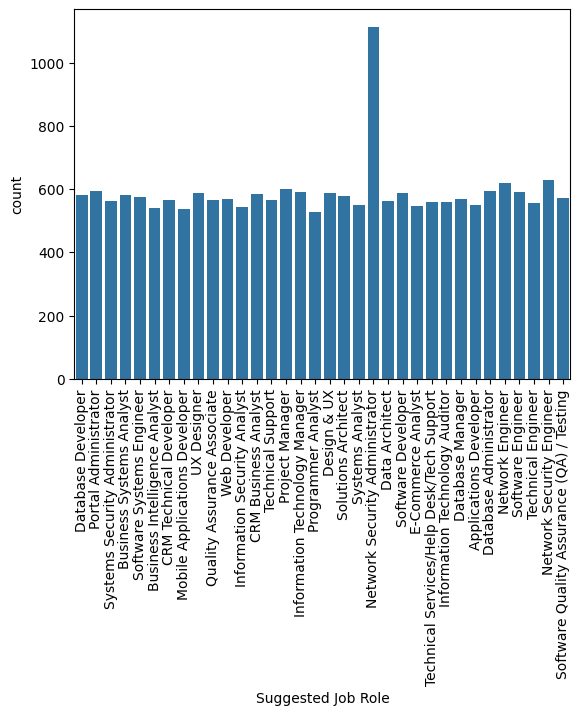

In [58]:
#checking number of counts per job roles
chart = sns.countplot(x=y)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()


In [59]:
warnings.filterwarnings("ignore")


###### OneHotEncoding the X data

In [60]:
X = OneHotEncoder().fit_transform(x)
Y = y.copy(deep=True)


In [61]:
X


<20000x470 sparse matrix of type '<class 'numpy.float64'>'
	with 760000 stored elements in Compressed Sparse Row format>

In [62]:
X2 = StandardScaler(with_mean=False).fit_transform(X)
y2 = y.copy(deep=True)
X2.shape


(20000, 470)

## Clubbing the Classification Labels

Now transforming data as shown under:

* 'Solutions Architect'  'Data Architect' 'Information Technology Auditor' --> others
* 'CRM Business Analyst' 'CRM Technical Developer' 'Project Manager' 'Information Technology Manager' --> Managerial roles/ CRM
* 'Business Systems Analyst' 'Business Intelligence Analyst''E-Commerce Analyst'--> Analyst 
* 'Mobile Applications Developer' 'Web Developer''Applications Developer'   --> Mobile Applications/ Web Development
* 'Software Quality Assurance (QA) / Testing' 'Quality Assurance Associate' --> QA/Testing
* 'UX Designer' 'Design & UX' --> UX/Design
* 'Database Developer' 'Database Administrator' 'Database Manager' 'Portal Administrator' --> Databases
* 'Programmer Analyst' 'Systems Analyst'--> Programming/ Systems Analyst
* 'Network Security Administrator' 'Network Security Engineer' 'Network Engineer''Systems Security Administrator' 'Software Systems Engineer''Information Security Analyst' --> Networks/ Systems
* 'Software Engineer' 'Software Developer' --> SE/SDE
* 'Technical Engineer' 'Technical Services/Help Desk/Tech Support' 'Technical Support'--> Technical Support/Service

In [63]:
y_trans = y.copy(deep=True)
y_trans


0                               Database Developer
1                             Portal Administrator
2                             Portal Administrator
3                   Systems Security Administrator
4                         Business Systems Analyst
                           ...                    
19995                           Technical Engineer
19996                           E-Commerce Analyst
19997                Business Intelligence Analyst
19998    Software Quality Assurance (QA) / Testing
19999                       Applications Developer
Name: Suggested Job Role, Length: 20000, dtype: object

###### LabelEncoding the Y data

In [64]:
Y1=LabelEncoder().fit_transform(y_trans)
Y2=np.asarray(y_trans)
Y2


array(['Database Developer', 'Portal Administrator',
       'Portal Administrator', ..., 'Business Intelligence Analyst',
       'Software Quality Assurance (QA) / Testing',
       'Applications Developer'], dtype=object)

In [65]:
CRM_Managerial_Roles = ['CRM Business Analyst','CRM Technical Developer','Project Manager','Information Technology Manager']
Analyst = ['Business Systems Analyst','Business Intelligence Analyst','E-Commerce Analyst']
Mobile_Applications_Web_Development = ['Mobile Applications Developer','Web Developer','Applications Developer']
QA_Testing = ['Software Quality Assurance (QA) / Testing','Quality Assurance Associate']
UX_Design = ['UX Designer','Design & UX']
Databases = ['Database Developer','Database Administrator','Database Manager','Portal Administrator']
Programming_Systems_Analyst = ['Programmer Analyst','Systems Analyst']
Networks_Systems = ['Network Security Administrator','Network Security Engineer','Network Engineer',
                    'Systems Security Administrator','Software Systems Engineer','Information Security Analyst']
SE_SDE = ['Software Engineer','Software Developer']
Technical_Support_Service = ['Technical Engineer','Technical Services/Help Desk/Tech Support','Technical Support']
others = ['Solutions Architect','Data Architect','Information Technology Auditor']


In [66]:
y_trans = y_trans.replace(['CRM Business Analyst','CRM Technical Developer','Project Manager',
                    'Information Technology Manager'],'CRM/Managerial Roles')
y_trans = y_trans.replace(['Business Systems Analyst','Business Intelligence Analyst','E-Commerce Analyst'],'Analyst')
y_trans = y_trans.replace(['Mobile Applications Developer','Web Developer',
                    'Applications Developer'],'Mobile Applications/ Web Development')
y_trans = y_trans.replace(['Software Quality Assurance (QA) / Testing','Quality Assurance Associate'],'QA/Testing')
y_trans = y_trans.replace(['UX Designer','Design & UX'] , 'UX/Design')
y_trans = y_trans.replace(['Database Developer','Database Administrator',
                    'Database Manager','Portal Administrator'] , 'Databases')
y_trans = y_trans.replace(['Programmer Analyst','Systems Analyst'],'Programming/ Systems Analyst')
y_trans = y_trans.replace(['Network Security Administrator','Network Security Engineer',
                    'Network Engineer','Systems Security Administrator',
                    'Software Systems Engineer','Information Security Analyst'],'Networks/ Systems')
y_trans = y_trans.replace(['Software Engineer','Software Developer'] ,'SE/SDE')
y_trans = y_trans.replace(['Technical Engineer','Technical Services/Help Desk/Tech Support',
                    'Technical Support'],'Technical Support/Service')
y_trans = y_trans.replace(['Solutions Architect','Data Architect','Information Technology Auditor'],'others')
y_trans


0                                   Databases
1                                   Databases
2                                   Databases
3                           Networks/ Systems
4                                     Analyst
                         ...                 
19995               Technical Support/Service
19996                                 Analyst
19997                                 Analyst
19998                              QA/Testing
19999    Mobile Applications/ Web Development
Name: Suggested Job Role, Length: 20000, dtype: object

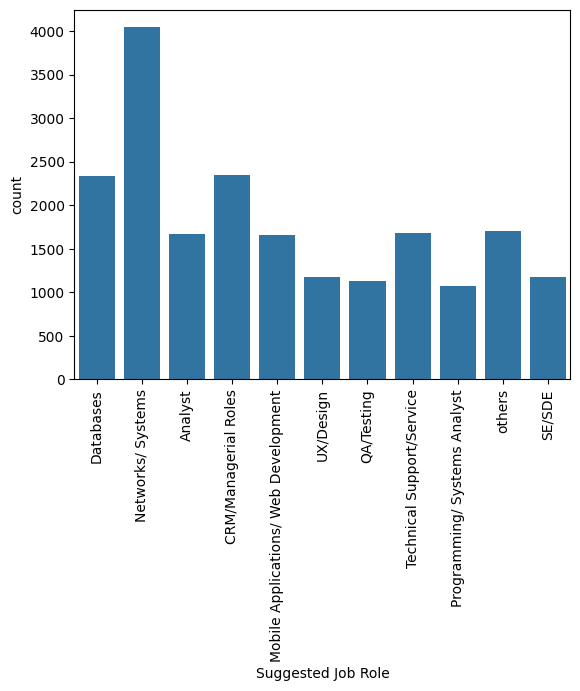

In [67]:
chart = sns.countplot(x=y_trans)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()


###### Performing Oversampling 

In [68]:
X3 = sparse.csr_matrix.copy(X2)
y3 = y_trans.copy(deep=True)
X3.shape


(20000, 470)

In [69]:
#Made use of randomoversampler for balancing the data sets with duplicates
ros = RandomOverSampler(random_state=42)
X_ovs, y_ovs = ros.fit_resample(X3, y3)


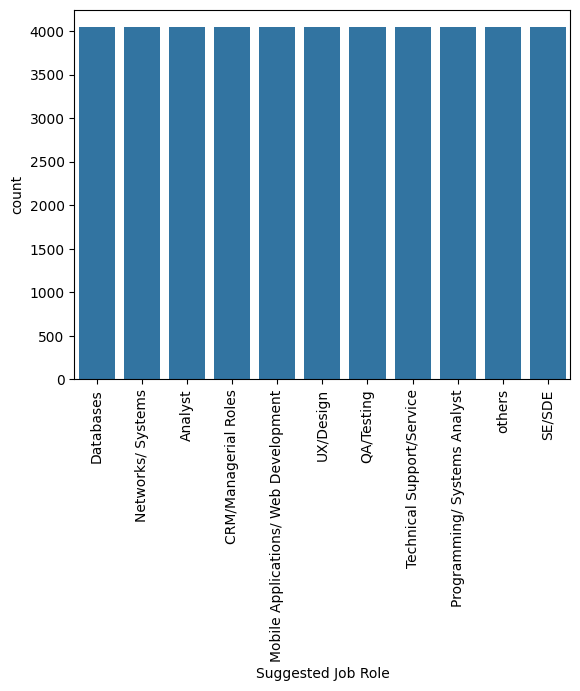

In [70]:
chart = sns.countplot(x=y_ovs)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()


In [71]:
X_ovs.shape


(44473, 470)

In [72]:
y_ovs.shape


(44473,)

## Train Test Split

* 80% Training Data
* 20% Testing Data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_ovs,y_ovs,test_size=0.2)


In [74]:
y_train.shape


(35578,)

## Training and Testing the ANN
### MLPClassifier (Multi Layer Perceptron)
###### Model Details:
* Activation: tanh (non-linear activation making it symmetric)
* Hidden Layers: 50,50,50
* Solver: Adam

### adam is an solver that minimizes losses with monitoring the learning rate

In [75]:
clf = MLPClassifier(activation='tanh', hidden_layer_sizes = (50,50,50), solver = 'adam') #, random_state=1)
clf.fit(X_train,y_train)
print("Training Accuracy Score: ",accuracy_score(clf.predict(X_train),y_train))



Training Accuracy Score:  0.9996064983978863


##### Dumping the  ANN model in the folder

In [76]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(clf)

# Save the model to disk
with open('Model/Career.pkl', 'wb') as file:
    pickle.dump(clf, file)


In [77]:
# Load the model from disk
with open('Model/Career.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
print("Testing Accuracy Score: ",accuracy_score(loaded_model.predict(X_test),y_test))


Testing Accuracy Score:  0.7833614390106801


## The accuracy of the model is around about 79- 80%

#### Classification Report

In [78]:
cm_train = confusion_matrix(clf.predict(X_train),y_train)
cm_test = confusion_matrix(clf.predict(X_test),y_test)
cm_train_cr = classification_report(clf.predict(X_train),y_train)
cm_test_cr = classification_report(clf.predict(X_test),y_test)
print("Train confusion matrix")
print(cm_train)
print("Test confusion matrix")
print(cm_test)
print("Train Classification Report")
print(cm_train_cr)
print("Test Classification Report")
print(cm_test_cr)
print("Train classwise accuracies")
print(cm_train.diagonal()/cm_train.sum(axis=1))
print("Test classwise accuracies")
print(cm_test.diagonal()/cm_test.sum(axis=1))


Train confusion matrix
[[3239    0    0    0    0    1    0    0    0    0    0]
 [   0 3242    0    0    0    0    0    0    0    0    0]
 [   0    0 3240    0    2    0    0    0    0    0    0]
 [   0    0    0 3219    1    0    0    0    0    1    0]
 [   0    1    4    0 3215    0    0    0    0    0    1]
 [   0    0    0    1    0 3224    0    0    0    0    0]
 [   0    0    0    0    0    0 3196    0    0    0    0]
 [   0    0    0    0    0    0    0 3225    0    0    0]
 [   0    0    0    1    0    0    0    0 3244    0    0]
 [   0    0    0    0    0    0    0    0    0 3267    1]
 [   0    0    0    0    0    0    0    0    0    0 3253]]
Test confusion matrix
[[671  27  25  14  85   7   1   9  18   4  10]
 [ 13 531  29  12  88   4  12  10  12   6  16]
 [ 11  30 544  15  89   4  11   7  13   6  17]
 [ 15  30  25 707  74   1   1   0  11   3  10]
 [ 14  48  51  19 107  12   1   6  10  10  18]
 [ 19  20  12  10  57 778   2   2   7   5   4]
 [ 16  15  26   2  65   4 801   6 

<Axes: >

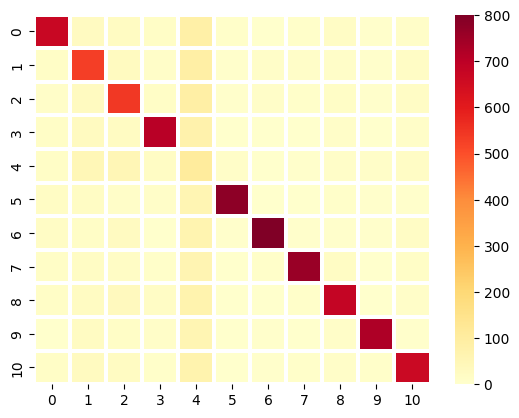

In [79]:
sns.heatmap(cm_test,linewidth=1.5,cmap='YlOrRd')


### CONCLUSION:

Model performs best when y is clubbed as the following

       'Databases', 'Networks/ Systems', 'Analyst',
       'CRM/Managerial Roles', 'Mobile Applications/ Web Development',
       'UX/Design', 'QA/Testing', 'Technical Support/Service',
       'Programming/ Systems Analyst', 'others', 'SE/SDE'
       
i.e. in total 11 classes

###### Clubbing technique
* 'Solutions Architect'  'Data Architect' 'Information Technology Auditor' --> others
* 'CRM Business Analyst' 'CRM Technical Developer' 'Project Manager' 'Information Technology Manager' --> Managerial roles/ CRM
* 'Business Systems Analyst' 'Business Intelligence Analyst''E-Commerce Analyst'--> Analyst 
* 'Mobile Applications Developer' 'Web Developer''Applications Developer'   --> Mobile Applications/ Web Development
* 'Software Quality Assurance (QA) / Testing' 'Quality Assurance Associate' --> QA/Testing
* 'UX Designer' 'Design & UX' --> UX/Design
* 'Database Developer' 'Database Administrator' 'Database Manager' 'Portal Administrator' --> Databases
* 'Programmer Analyst' 'Systems Analyst'--> Programming/ Systems Analyst
* 'Network Security Administrator' 'Network Security Engineer' 'Network Engineer''Systems Security Administrator' 'Software Systems Engineer''Information Security Analyst' --> Networks/ Systems
* 'Software Engineer' 'Software Developer' --> SE/SDE
* 'Technical Engineer' 'Technical Services/Help Desk/Tech Support' 'Technical Support'--> Technical Support/Service

###### Transformation on X ==> OneHotEncoder and StandardScaler applied

###### Transformation on dataset as whole ==> oversampling

###### with following parameters:
* activation='tanh'
* hidden_layer_sizes = (50,50,50)
* solver = 'adam'
* train_test_split = 0.2

## Giving new input to the Trained Neural Network

In [84]:
x.loc[-1]=[69,93,67,78,89,78,94,75,67,9,7,4,6,6,'yes','no','yes','machine learning','data science','yes','yes',
              'excellent','poor','Management','Business process analyst','job','Sales and Marketing','yes',
              'no','Mystery','salary','yes','gentle','Management','work','smart worker','yes','yes']
x.index=x.index+1
x=x.sort_index()
x.shape


(20003, 38)

In [85]:
new_data = OneHotEncoder().fit_transform(x)
new_data = StandardScaler(with_mean=False).fit_transform(new_data)
new_data = sparse.csr_matrix.copy(new_data)
output=clf.predict(new_data[1])
output


array(['others'], dtype='<U36')

###### Classwise Confidence Score

In [86]:
pred_prob=clf.predict_proba(new_data[1])
pred_prob


array([[2.72769256e-11, 6.43975351e-05, 1.69993244e-01, 1.66422774e-08,
        2.45284829e-01, 6.50183223e-07, 7.52389035e-12, 2.28305383e-19,
        2.09129657e-01, 1.34126166e-13, 3.75527206e-01]])

### De-clubbing the output

In [87]:
if output[0] == 'CRM/Managerial Roles':
    cat=CRM_Managerial_Roles
elif output[0] == 'Analyst':
    cat=Analyst
elif output[0] == 'Mobile Applications/ Web Development':
    cat=Mobile_Applications_Web_Development
elif output[0] == 'QA/Testing':
    cat=QA_Testing
elif output[0] == 'UX/Design':
    cat=UX_Design
elif output[0] == 'Databases':
    cat=Databases
elif output[0] == 'Programming/ Systems Analyst':
    cat=Programming_Systems_Analyst
elif output[0] == 'Networks/ Systems':
    cat=Networks_Systems
elif output[0] == 'SE/SDE':
    cat=SE_SDE
elif output[0] == 'Technical Support/Service':
    cat=Technical_Support_Service
else:
    cat=others


In [88]:
print("suggested job role catogory is: '",output[0],"'")
print()
print("possible job roles in the suggested category are:")
for i in cat:
    print(i)


suggested job role catogory is: ' others '

possible job roles in the suggested category are:
Solutions Architect
Data Architect
Information Technology Auditor


## Checking PCA Analysis if it performs better ?

## PCA (Principle Component Analysis) 2D and 3D

In [36]:
scalar = StandardScaler()
scalar.fit(data.iloc[:,:9])
scaled_data = scalar.transform(data.iloc[:,:9])  
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape


(20000, 2)

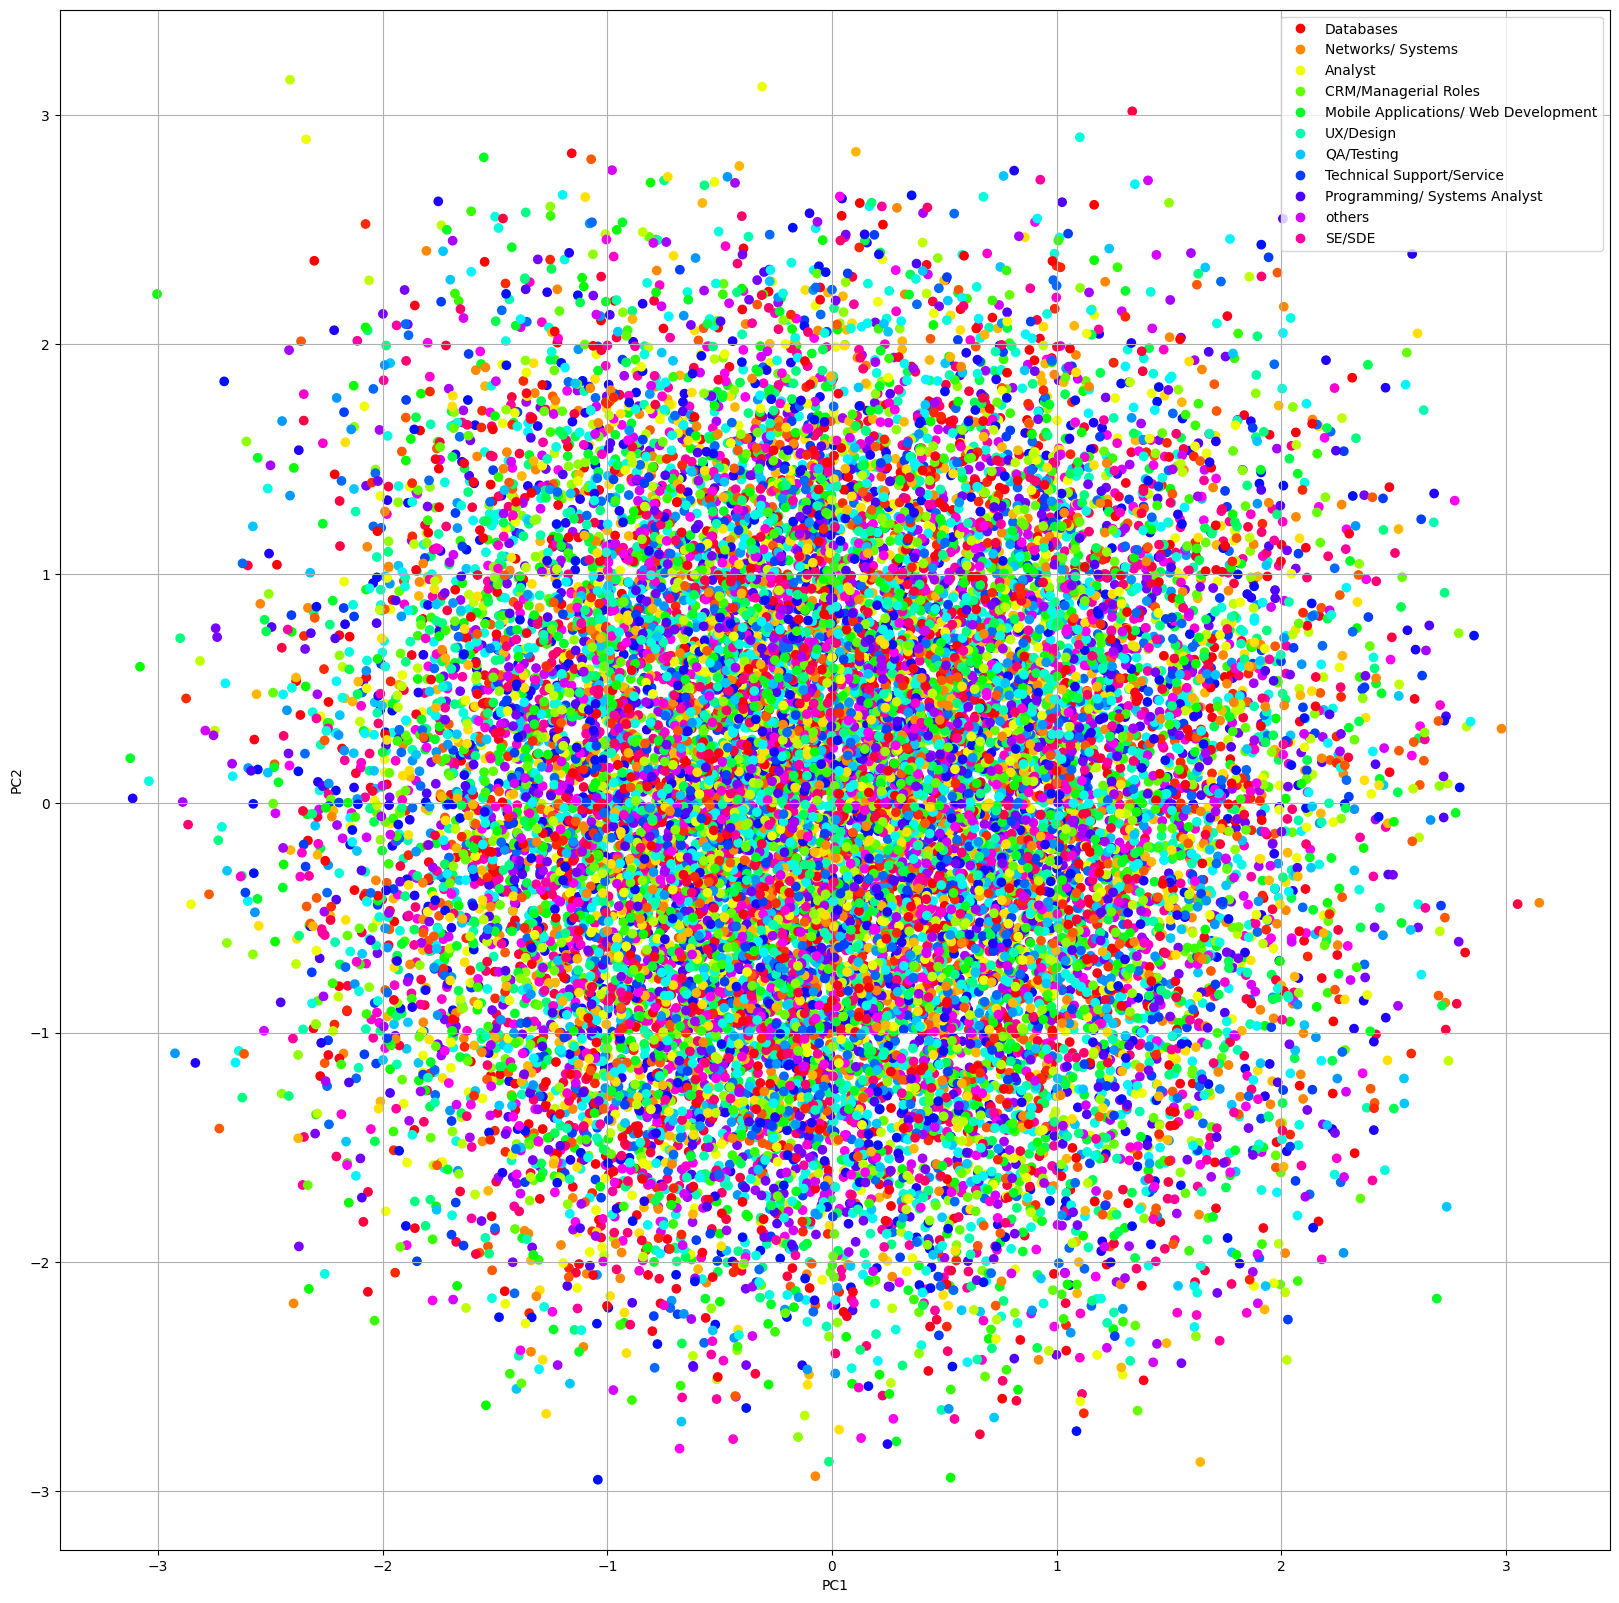

In [37]:
fig = plt.figure(figsize=(20,20))
axis = fig.add_subplot()
plot=axis.scatter(x_pca[:,0],x_pca[:,1], c=Y1,cmap='hsv')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
plt.legend(handles=plot.legend_elements()[0],labels=y_trans.unique().tolist())
plt.grid(True)


In [38]:
scalar = StandardScaler()
scalar.fit(data.iloc[:,:9])
scaled_data = scalar.transform(data.iloc[:,:9])  
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape


(20000, 3)

In [39]:
pca.components_


array([[-0.15687155, -0.11500602, -0.12728255, -0.64959061,  0.47587735,
        -0.13416351,  0.08325644,  0.04875954, -0.51983449],
       [-0.70369585, -0.08790035,  0.21419026, -0.14447414, -0.17119211,
         0.38255625, -0.50397189,  0.00930258,  0.02460099],
       [-0.0764696 , -0.44109189, -0.49112521, -0.01439304, -0.02702321,
        -0.06954056, -0.03693922,  0.67487828,  0.30949617]])

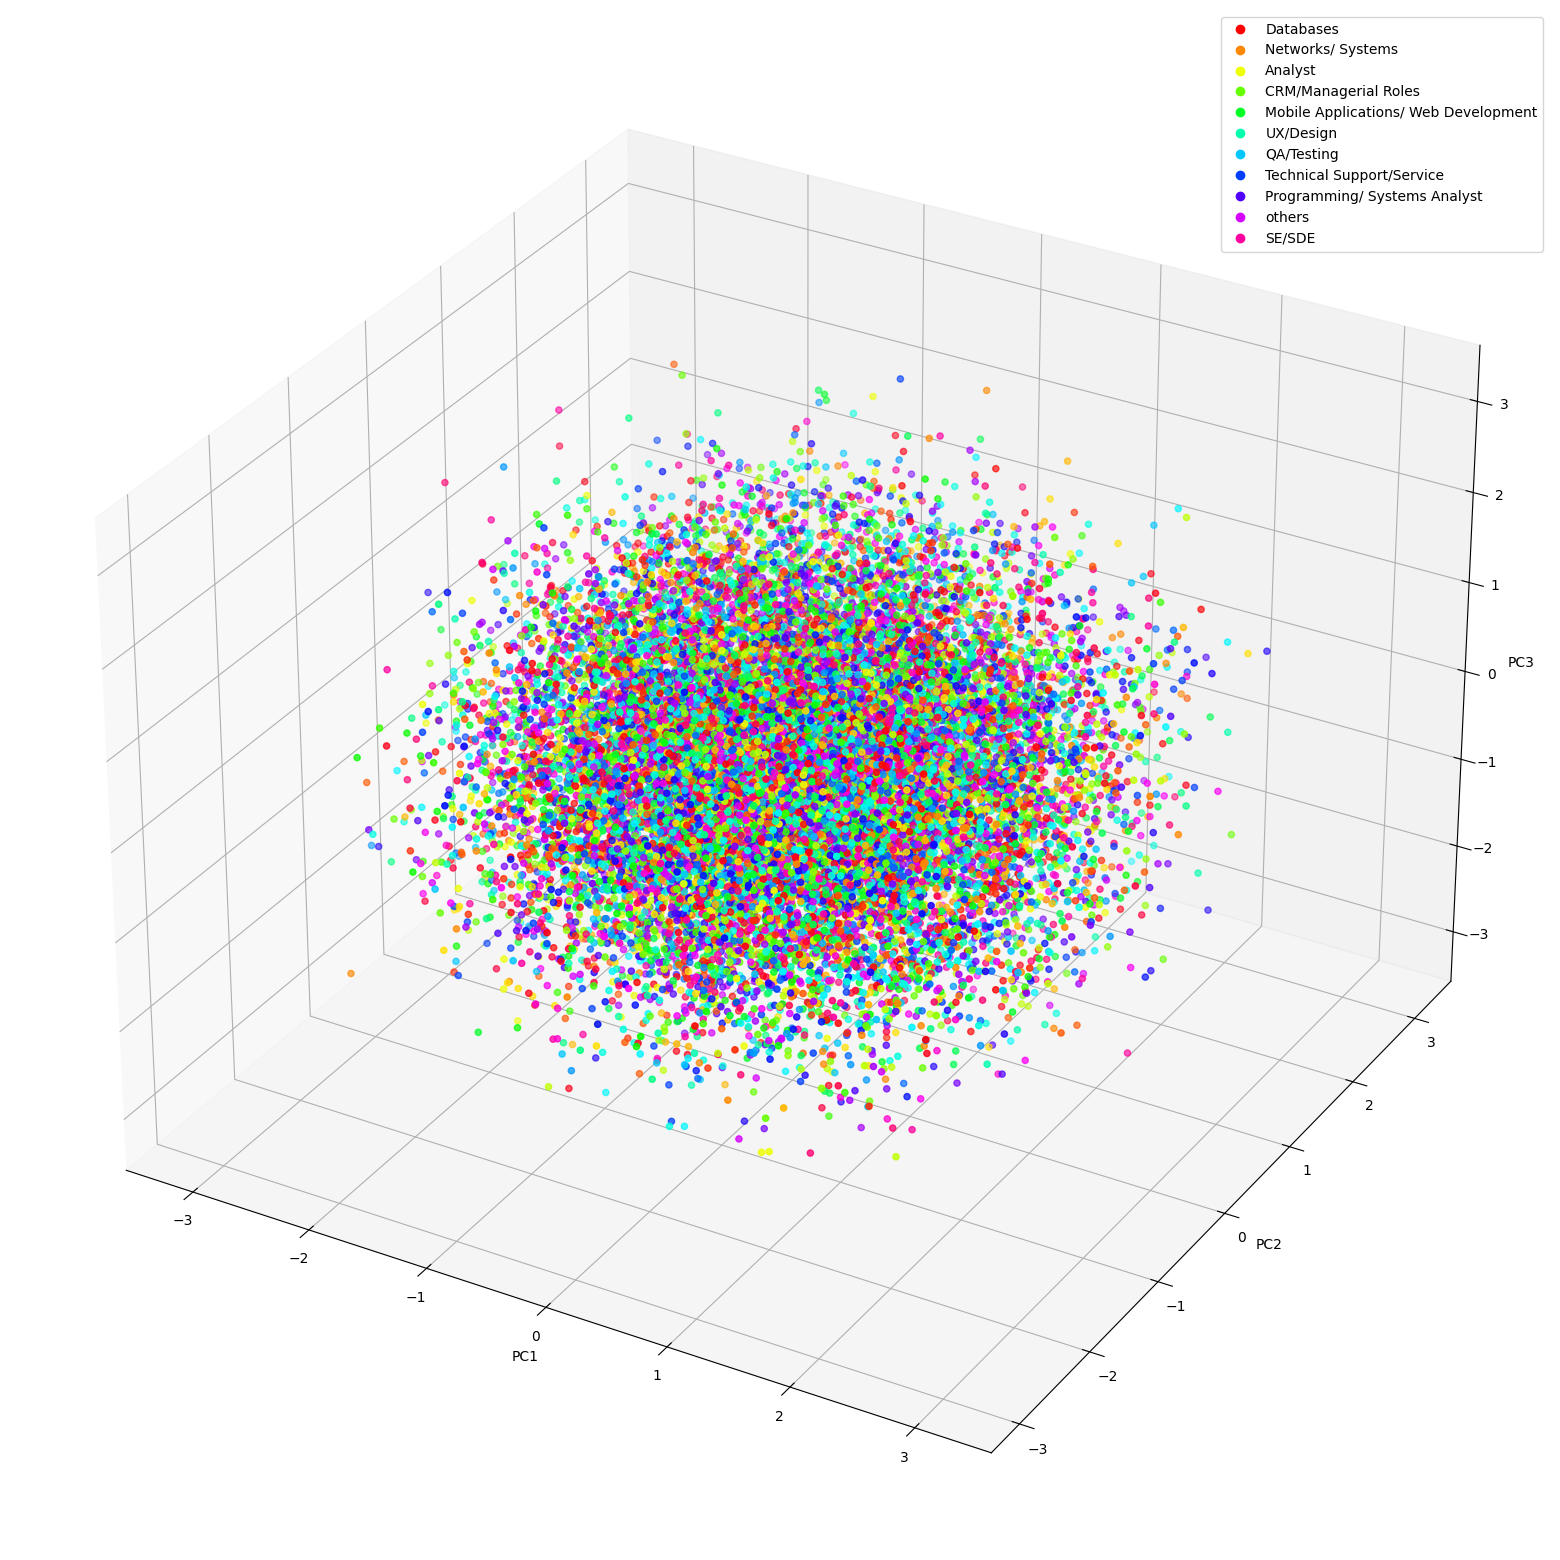

In [40]:
fig = plt.figure(figsize=(20,20))
axis = fig.add_subplot(projection='3d')
plot=axis.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2], c=Y1,cmap='hsv')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.legend(handles=plot.legend_elements()[0],labels=y_trans.unique().tolist())


### Oversampling the Data

In [41]:
X_ovs1, y_ovs1 = ros.fit_resample(x_pca, y_trans)


In [42]:
X_ovs1.shape


(44473, 3)

In [43]:
y_ovs1.shape


(44473,)

### Train Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y_trans,test_size=0.2)


### Training the ANN

In [48]:
clf = MLPClassifier(activation='relu', hidden_layer_sizes = (50,50,50,50), solver = 'adam') #, random_state=1)
clf.fit(X_train,y_train)
print("Training Accuracy Score: ",accuracy_score(clf.predict(X_train),y_train))
print("Testing Accuracy Score: ",accuracy_score(clf.predict(X_test),y_test))


Training Accuracy Score:  0.2251875
Testing Accuracy Score:  0.1855


### Classification Report

In [46]:
cm_train = confusion_matrix(clf.predict(X_train),y_train)
cm_test = confusion_matrix(clf.predict(X_test),y_test)
cm_train_cr = classification_report(clf.predict(X_train),y_train)
cm_test_cr = classification_report(clf.predict(X_test),y_test)
print("Train confusion matrix")
print(cm_train)
print("Test confusion matrix")
print(cm_test)
print("Train Classification Report")
print(cm_train_cr)
print("Test Classification Report")
print(cm_test_cr)
print("Train classwise accuracies")
print(cm_train.diagonal()/cm_train.sum(axis=1))
print("Test classwise accuracies")
print(cm_test.diagonal()/cm_test.sum(axis=1))


Train confusion matrix
[[  53   14   23   21   27    9    9    9   11    9   12]
 [  79  245  101   73  125   50   82   57   69   31   91]
 [ 137  151  285  101  208   67   67   87  119   70  118]
 [  26   31   24   64   33   14   11   18   22   19   20]
 [1018 1367 1378 1024 2762  680  664  720 1025  771 1032]
 [   2    1    2    0    5   11    0    0    2    0    1]
 [   4    7    8    3    5    2   24    2    4    6    9]
 [   0   11   11    5   10    3    5   24    9    5    6]
 [  19   22   33   25   39   11   14   29   80   13   18]
 [   3    1    0    2    0    0    0    1    3    7    3]
 [   4   16   16    9   17    6   12   13   12   12   40]]
Test confusion matrix
[[  7   5   3   1   7   3   1   1   6   2   2]
 [ 21  35  38  24  45  20  15  14  23  11  26]
 [ 24  40  45  25  81  24  26  14  30  19  36]
 [  3   5   9   6  14   3   2   7   2   4   3]
 [257 377 343 266 626 164 194 166 251 184 272]
 [  0   0   2   0   2   0   1   2   1   0   1]
 [  4   0   3   1   2   2   1   4 

<Axes: >

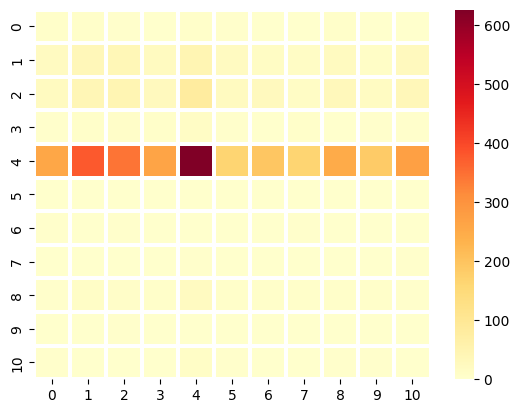

In [47]:
sns.heatmap(cm_test,linewidth=1.5,cmap='YlOrRd')


## Outcome

###### This model did NOT work. It rather performed worse than previous. Thus, the previous model is the best performer without PCA.

##### Overview the machine cannot dettermine the potential of an human being one takes its own interest in its own interesting way ."Getting to know is better then having a pre-knowlegde